## Introduction to API

### What is an API?
- Application Programming Interface
- Set of communication rules and abilities
- Enables interactions between software application

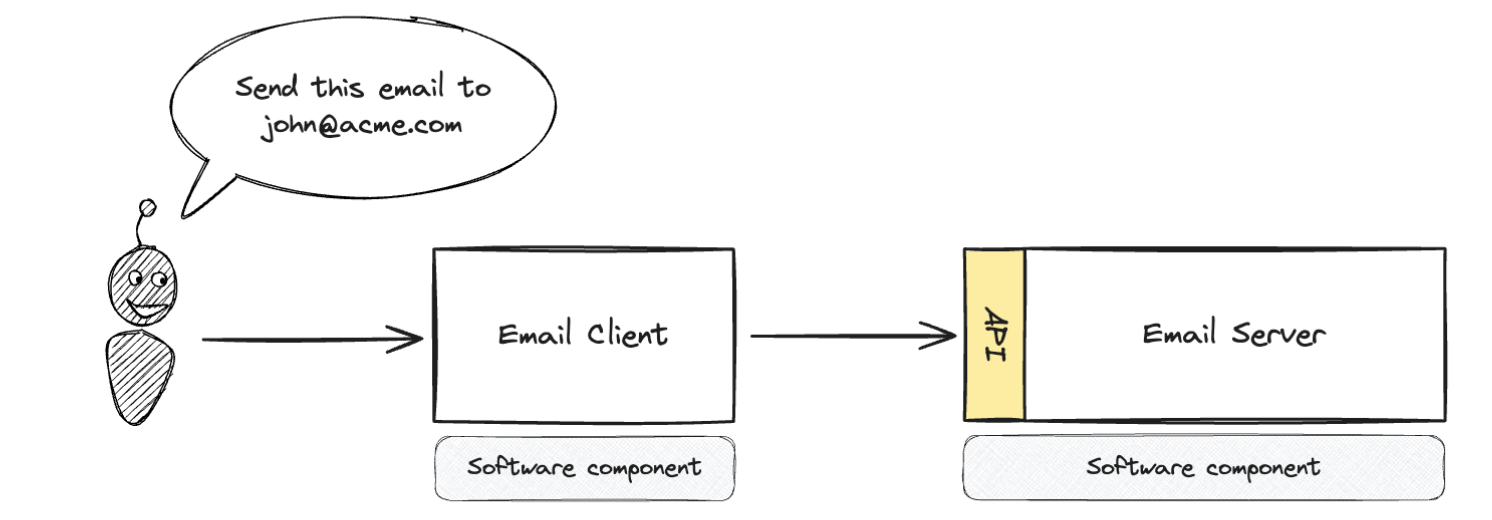

### Web APIs, clients and servers
- Web APIs communicate over the internet using HTTP
- Client sends a request message to a Server
- Server returns a response message to the Client
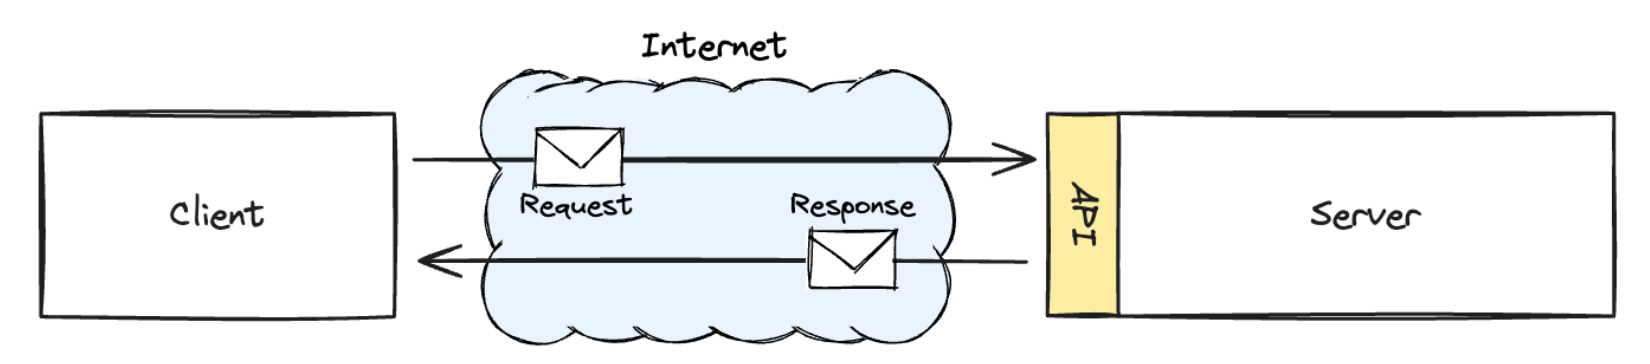
- Request/Response cycle

### Types of Web APIs
1. **SOAP**
   - Focus on strict and formal API design
   - Enterprise applications<br><br>

2. **REST**
   - Focus on simplicity & scalability
   - Most common API architecture<br><br>

3. **GraphQL**
   - Focus on flexibility
   - Optimized for performance

### Working with APIs in Python
1. **urllib**
    - Bundled with Python
    - Powerful but not very developer-friendly

In [ ]:
from urllib.request import url

openapi = "http://api.music-catalog.com/"

with urlopen(api) as response:  
    data = response.read() 
    string = data.decode()
    print(string)

2. **requests**
   - Many powerful built-in features
   - Easier to use

In [1]:
import requests

api = "http://api.music-catalog.com/"

response = requests.get(api)
print(response.text)

<html>
<head><title>403 Forbidden</title></head>
<body>
<center><h1>403 Forbidden</h1></center>
<hr><center>nginx</center>
</body>
</html>



In [ ]:
# Practice 1

from urllib.request import urlopen

with urlopen('http://localhost:3000/lyrics/') as response:
  
  # Use the correct function to read the response data from the response object
  data = response.read()
  encoding = response.headers.get_content_charset()

  # Decode the response data so you can print it as a string later
  string = data.decode(encoding)
  
  print(string)

In [ ]:
# Practice 2

# Import the requests package
import requests

# Pass the API URL to the get function
response = requests.get('http://localhost:3000/lyrics')

# Print out the text attribute of the response object
print(response.text)

## The basic anatomyof an API request

### What are URLs?
- URL = Uniform Resource Locator
- The structured address to an API Resource
- Customize the URL to interact with specific API Resources
- `http://350.5th-ave.com/unit/243`

### Dissecting the URL
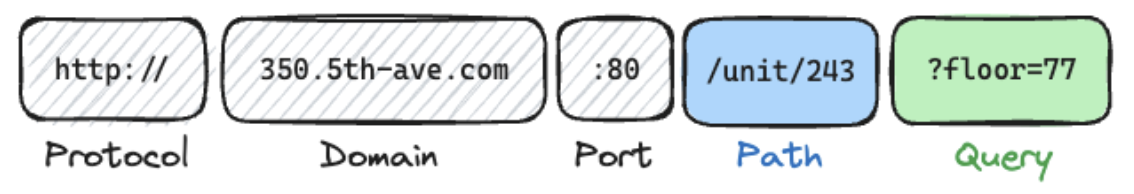
- **Protocol** = the means of transportation
- **Domain** = the street address of the office building
- **Port** = the gate or door to use when entering the building
- **Path** = the specific office unit inside the building
- **Query** = any additional instructions

### Adding query parameters with requests

In [ ]:
# Append the query parameter to the URL string
response = requests.get('http://350.5th-ave.com/unit/243?floor=77&elevator=True')
print(response.url)

### Use the `params` argument to add query parameters

In [ ]:
# Create dictionary
query_params = {'floor': 77, 'elevator': True}

# Pass the dictionary using the `params` argument
response = requests.get('http://350.5th-ave.com/unit/243', params=query_params)
print(response.url)

### HTTP Verbs
- **Destination**: Unit 243 of the 350 5th Ave office building
- **URL**: `http://350.5th-ave.com/unit/243`

### Actions
| Verb   | Action  | Description                               |
|--------|----------|-------------------------------------------|
| GET    | Read     | Check the mailbox contents                |
| POST   | Create   | Drop a new package in the mailbox         |
| PUT    | Update   | Replace all packages with a new one       |
| DELETE | Delete   | Remove all packages from the mailbox      |

### Sending data via POST and PUT

In [ ]:
# GET = Retrieve a resource
response = requests.get('http://350.5th-ave.com/unit/243')

# POST = Create a resource
response = requests.post('http://350.5th-ave.com/unit/243', data={"key": "value"})

# PUT = Update an existing resource
response = requests.put('http://350.5th-ave.com/unit/243', data={"key": "value"})

# DELETE = Remove a resource
response = requests.delete('http://350.5th-ave.com/unit/243')

- Each verb has it's own method in the `requests` package
- Use the `data` argument to pass data to a POST or PUT request.

In [ ]:
# Practice 3

# Add the `include_track` parameter
query_params = {'artist': 'Deep Purple', 'include_track' : True}

response = requests.get('http://localhost:3000/lyrics/random', params=query_params)

# Print the response URL
print(response.url)

# Print the lyric
print(response.text)

In [ ]:
# Practice 4

# Get a list of all playlists from the API
response = requests.get('http://localhost:3000/playlists')
print(response.text)

# ====================================================================================
# Create a dictionary with the playlist info
playlist_data = {'Name': 'Rock Ballads'}

# Perform a POST request to the playlists API with your dictionary as data parameter
response = requests.post('http://localhost:3000/playlists', data=playlist_data)
print(response.text)

# ====================================================================================
# Perform a GET request to get info on playlist with PlaylistId 2
response = requests.get('http://localhost:3000/playlists/2')

print(response.text)

# ====================================================================================
# Perform a DELETE request to the playlist API using the path to playlist with PlaylistId 2
requests.delete('http://localhost:3000/playlists/2')

# Get the list of all existing playlists again
response = requests.get('http://localhost:3000/playlists')
print(response.text)

## Headers and status codes

### Request and response message anatomy
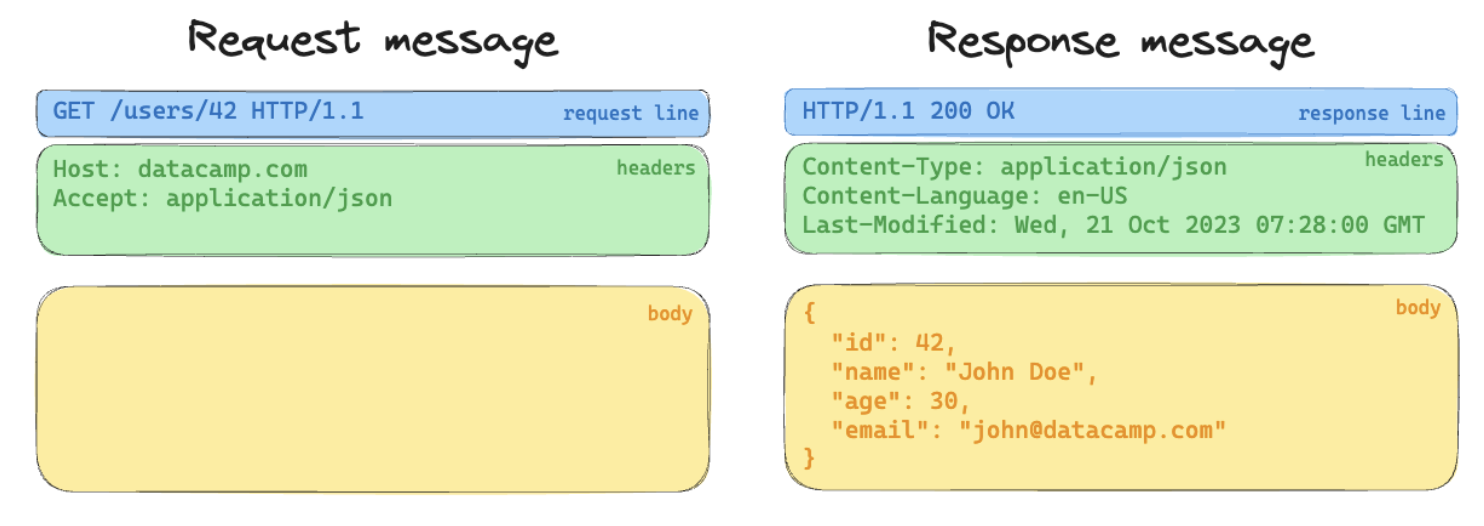

### The start-line
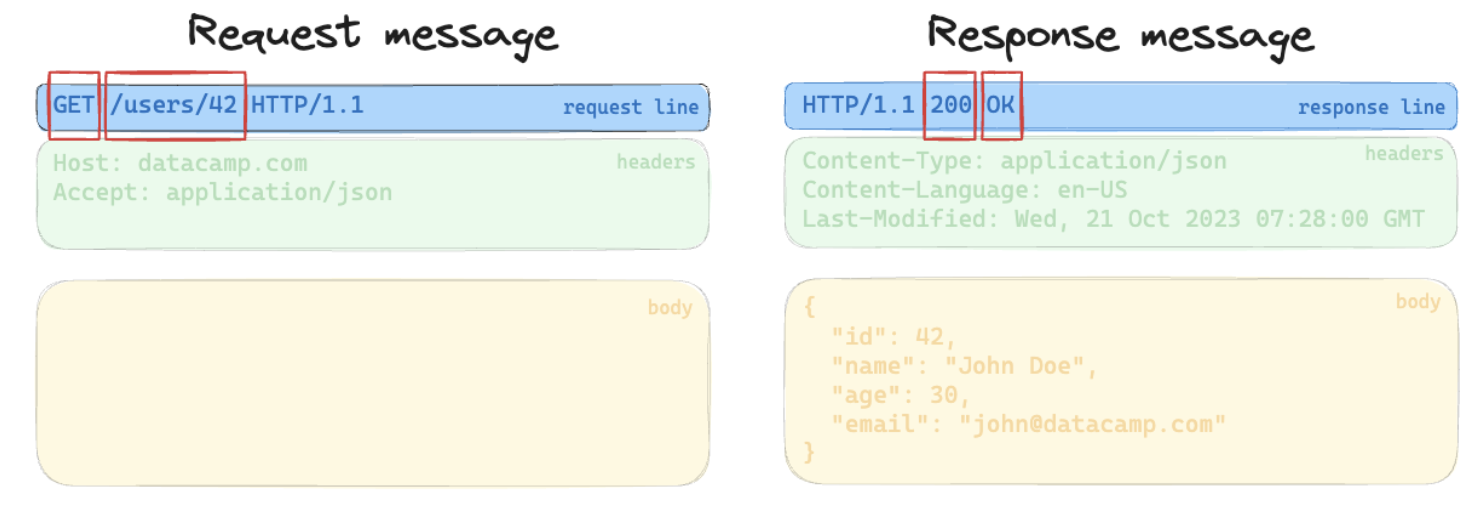

- A server will always include a numeric status code in the response message

### Status codes
### Status code categories
- `1XX`: Informational responses
- `2XX`: Successful responses
- `3XX`: Redirection messages
- `4XX`: Client error responses
- `5XX`: Server error responses

### Frequently used status codes
- `200`: OK
- `404`: Not Found
- `500`: Internal Server Error 

### Headers
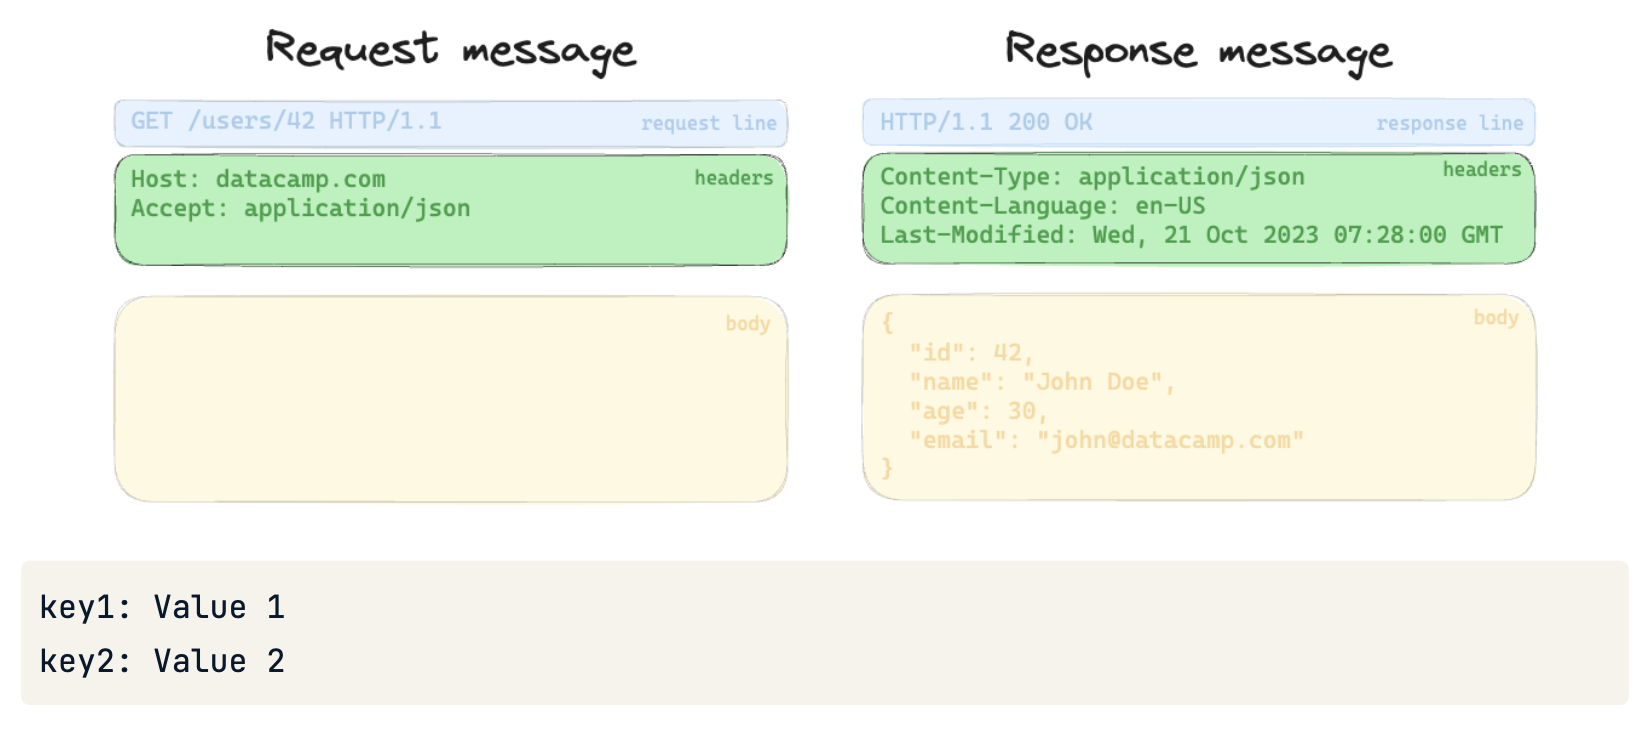

### Example: Content negotiation with headers
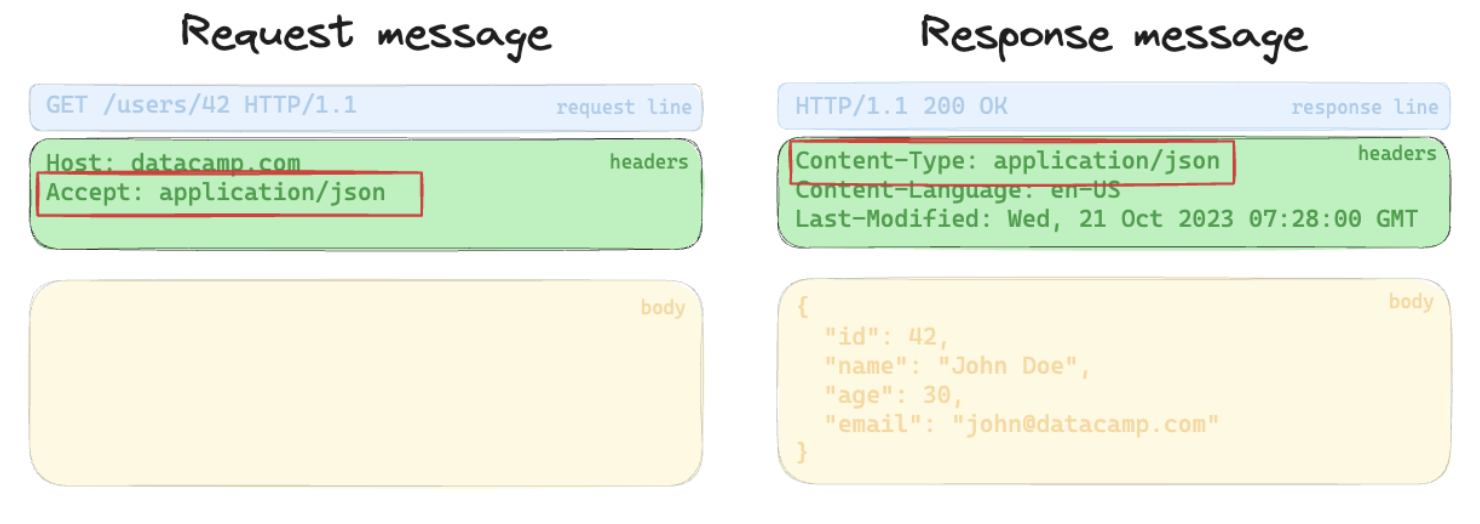

- Client adds an `accept: application/json` header to the request
- Server responds with a `content-type: application/json` header

### Headers with requests

In [ ]:
# Adding headers to a request
response = requests.get(
    'https://api.datacamp.com', 
    headers={'accept':'application/json'}
)

In [ ]:
# Reading response headers
response.headers['content-type']

In [ ]:
response.headers.get('content-type')

### Status codes with requests

In [ ]:
# Accessing the status code
response = requests.get('https://api.datacamp.com/users/12')
response.status_code == 200

In [ ]:
# Looking up status codes using requests.codes
response = requests.get('https://api.datacamp.com/this/is/the/wrong/path')
response.status_code == requests.codes.not_found

In [ ]:
# Practice 5

response = requests.get('http://localhost:3000/lyrics')

# Check the response status code
if (response.status_code == 200):
  print('The server responded succesfully!')

In [ ]:
# Practice 6

# Make a request to the movies endpoint of the API
response = requests.get('http://localhost:3000/movies')

if (response.status_code == 200):
  print('The server responded succesfully!')
  
# Check the response status code
elif (response.status_code == 404):
  print('Oops, that API could not be found!')

In [ ]:
# Practice 7

response = requests.get('http://localhost:3000/movies')

# Check if the response.status_code is equal to the requests.codes value for "200 OK"
if (response.status_code == requests.codes.ok):
  print('The server responded succesfully!')
  
# Or if the request was not successful because the API did not exist
elif (response.status_code == requests.codes.not_found):
  print('Oops, that API could not be found!')

In [ ]:
# Practice 8

response = requests.get('http://localhost:3000/lyrics')

# Print the response content-type header
print(response.headers['content-type'])

# =====================================================================
response = requests.get('http://localhost:3000/lyrics')

# Print the response accept header
print(response.headers['accept'])

# =====================================================================
# Set the content type to application/json
headers = {'accept': 'application/json'}
response = requests.get('http://localhost:3000/lyrics', headers=headers)

# Print the response's text
print(response.text)

In [ ]:
# Practice 9

# Add a header to use in the request
headers = {'accept': 'application/xml'}
response = requests.get('http://localhost:3000/lyrics', headers=headers)

# Check if the server did not accept the request
if (response.status_code == 406):
  print('The server can not respond in XML')
  
  # Print the accepted content types
  print('These are the content types the server accepts: ' + response.headers['accept'])
else:
  print(response.text)